## Problem Statement

#### Import Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Gathering

In [2]:
raw_data = pd.read_csv('NBFC data.csv')

In [3]:
raw_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
raw_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
raw_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
raw_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Data Cleaning

In [7]:
### filling the missing values with the help of simple imputer


In [8]:
from sklearn.impute import SimpleImputer

In [9]:
simple_imputer = SimpleImputer(missing_values=np.nan,  strategy='most_frequent')
simple_imputer_continious = SimpleImputer(missing_values=np.nan,  strategy='median')

simple_imputer_continious_zero_impute = SimpleImputer(missing_values=0,  strategy='median')

In [10]:
gender = simple_imputer.fit_transform(raw_data[['Gender']])
married = simple_imputer.fit_transform(raw_data[['Married']])
dependents = simple_imputer.fit_transform(raw_data[['Dependents']])
self_employed = simple_imputer.fit_transform(raw_data[['Self_Employed']])
loanamount = simple_imputer_continious.fit_transform(raw_data[['LoanAmount']])
loan_amount_term = simple_imputer.fit_transform(raw_data[['Loan_Amount_Term']])
credit_history = simple_imputer.fit_transform(raw_data[['Credit_History']])

coapplicantincome = simple_imputer_continious_zero_impute.fit_transform(raw_data[['CoapplicantIncome']])

raw_data[['Gender']] = gender
raw_data[['Married']] = married
raw_data[['Dependents']] = dependents
raw_data[['Self_Employed']] = self_employed
raw_data[['LoanAmount']] = loanamount
raw_data[['Loan_Amount_Term']] = loan_amount_term
raw_data[['Credit_History']] = credit_history
raw_data[['CoapplicantIncome']] = coapplicantincome

In [11]:
raw_data.shape

(614, 13)

## EDA(Exploratory data analysis)

In [12]:
### removing the non important attribute from the data

In [13]:
raw_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,2166.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,2166.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,2166.0,141.0,360.0,1.0,Urban,Y


In [14]:
raw_data.drop('Loan_ID',inplace=True,axis=1)

In [15]:
raw_data['Dependents'].loc[ raw_data['Dependents'] == '3+'] = 3

C:\Users\patil\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [16]:
dummies_data = pd.get_dummies(raw_data,drop_first=True)

In [17]:
dummies_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,2166.0,128.0,360.0,1.0,1,0,1,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,0,0,0,0
2,3000,2166.0,66.0,360.0,1.0,1,1,1,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,0,0,1,1
4,6000,2166.0,141.0,360.0,1.0,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,2166.0,71.0,360.0,1.0,0,0,1,0,0,0,0,0,0,1
610,4106,2166.0,40.0,180.0,1.0,1,1,0,0,0,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
612,7583,2166.0,187.0,360.0,1.0,1,1,0,0,1,0,0,0,1,1


In [18]:
# dummies_data.to_csv('dummiesdata.csv')

In [19]:
### checking the correlation between input variable  

<AxesSubplot:>

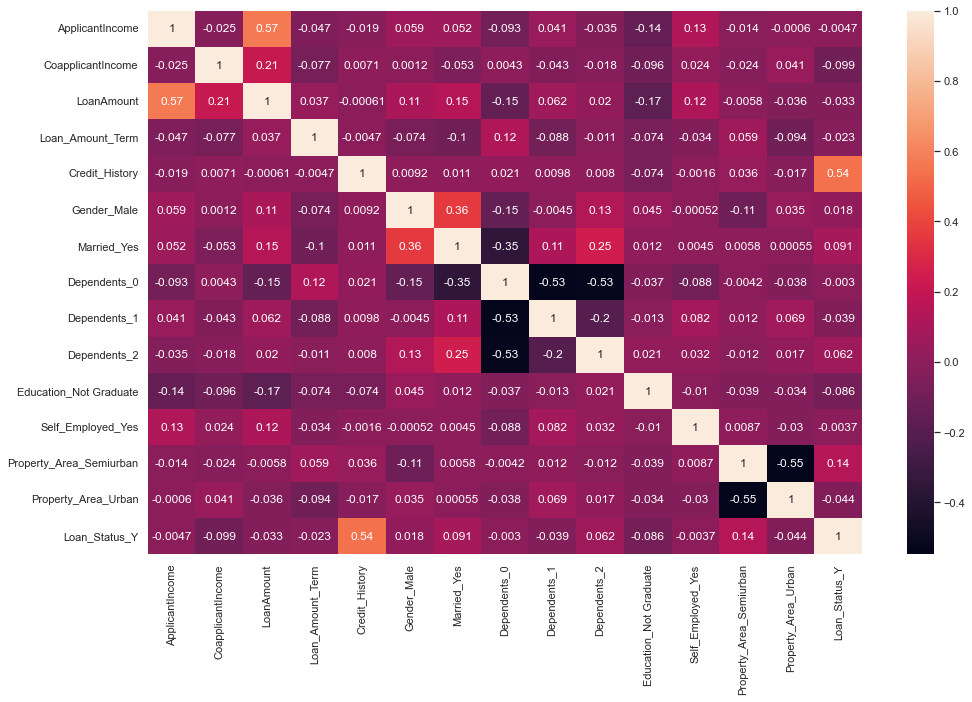

In [20]:
plt.figure(figsize=(16,10))
sns.heatmap(dummies_data.corr(),annot=True)

In [21]:
dummies_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [22]:
dummies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Male              614 non-null    uint8  
 6   Married_Yes              614 non-null    uint8  
 7   Dependents_0             614 non-null    uint8  
 8   Dependents_1             614 non-null    uint8  
 9   Dependents_2             614 non-null    uint8  
 10  Education_Not Graduate   614 non-null    uint8  
 11  Self_Employed_Yes        614 non-null    uint8  
 12  Property_Area_Semiurban  614 non-null    uint8  
 13  Property_Area_Urban      614 non-null    uint8  
 14  Loan_Status_Y            6

In [23]:
dummies_data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_list = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban']

variables = dummies_data[features_list]

vif = pd.DataFrame()
vif['Features'] = features_list
vif['VIF'] = [variance_inflation_factor(variables.values ,i)  for i in range(variables.shape[1])]

vif

,Features,VIF
0,ApplicantIncome,2.762729
1,CoapplicantIncome,2.164615
2,LoanAmount,6.729589
3,Loan_Amount_Term,16.243696
4,Credit_History,6.408942
5,Gender_Male,6.074255
6,Married_Yes,3.689732
7,Dependents_0,7.182093
8,Dependents_1,2.669562
9,Dependents_2,2.755232


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

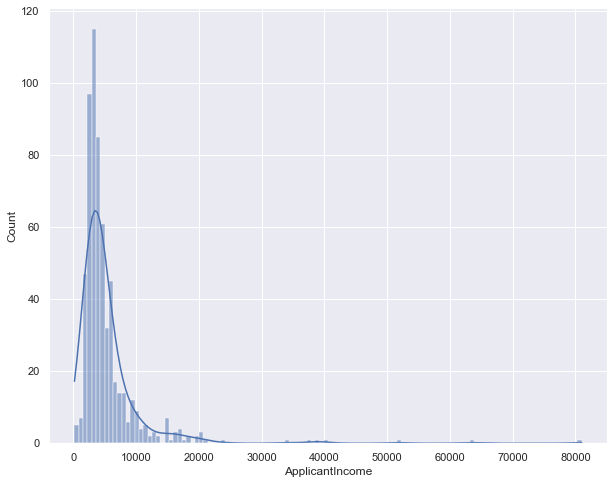

In [25]:
plt.figure(figsize=(10,8))
sns.histplot(dummies_data['ApplicantIncome'],kde=True)

In [26]:
# LoanAmount	Loan_Amount_Term	Credit_History

q = dummies_data['ApplicantIncome'].quantile(q=0.98)

In [27]:
dummies_data = dummies_data[  dummies_data['ApplicantIncome'] < q ]
dummies_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,2166.0,128.0,360.0,1.0,1,0,1,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,0,0,0,0
2,3000,2166.0,66.0,360.0,1.0,1,1,1,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,0,0,1,1
4,6000,2166.0,141.0,360.0,1.0,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,2166.0,71.0,360.0,1.0,0,0,1,0,0,0,0,0,0,1
610,4106,2166.0,40.0,180.0,1.0,1,1,0,0,0,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
612,7583,2166.0,187.0,360.0,1.0,1,1,0,0,1,0,0,0,1,1


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

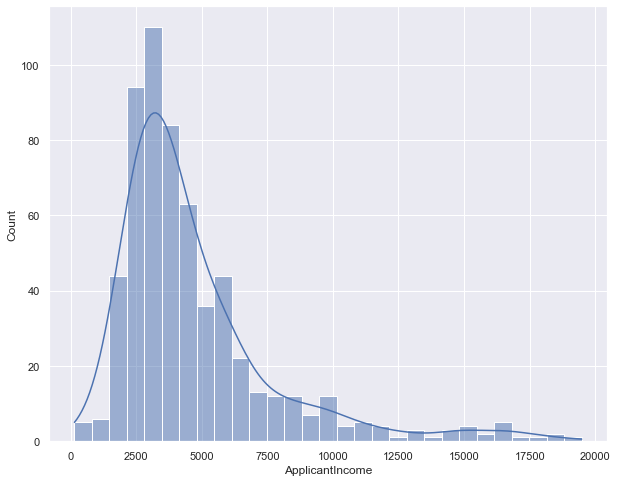

In [28]:
plt.figure(figsize=(10,8))
sns.histplot(dummies_data['ApplicantIncome'],kde=True)

C:\Users\patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

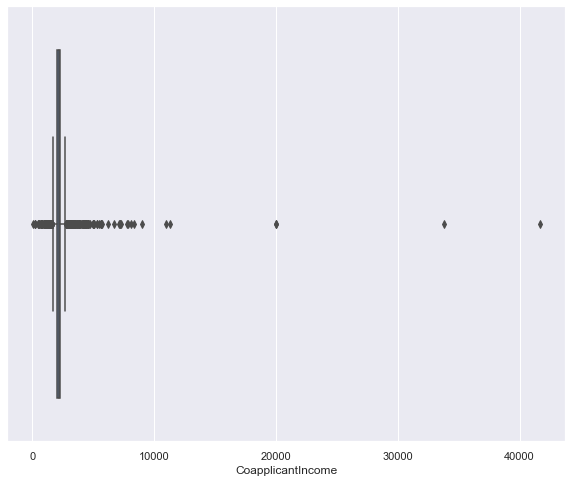

In [29]:
plt.figure(figsize=(10,8))
sns.boxplot( dummies_data['CoapplicantIncome'] )

In [30]:
q = dummies_data['CoapplicantIncome'].quantile(q=0.99)

In [31]:
###Removing the outliers from the dataset

In [32]:
### with the help of quantile method removing 1% data points from ['CoapplicantIncome']

In [33]:
dummies_data = dummies_data[  dummies_data['CoapplicantIncome'] < q ]
dummies_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,2166.0,128.0,360.0,1.0,1,0,1,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,0,0,0,0
2,3000,2166.0,66.0,360.0,1.0,1,1,1,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,0,0,1,1
4,6000,2166.0,141.0,360.0,1.0,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,2166.0,71.0,360.0,1.0,0,0,1,0,0,0,0,0,0,1
610,4106,2166.0,40.0,180.0,1.0,1,1,0,0,0,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
612,7583,2166.0,187.0,360.0,1.0,1,1,0,0,1,0,0,0,1,1


C:\Users\patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

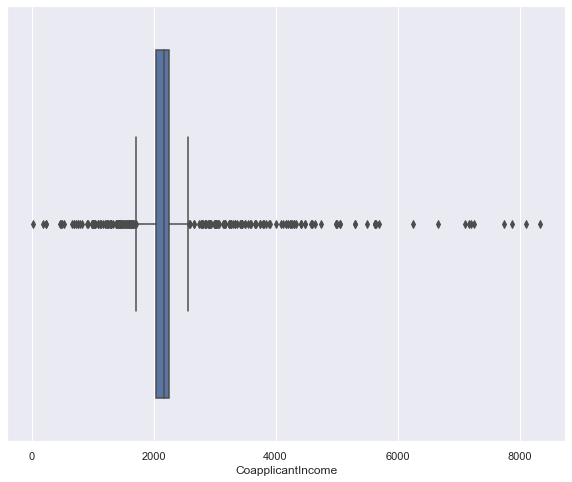

In [34]:
plt.figure(figsize=(10,8))
sns.boxplot( dummies_data['CoapplicantIncome'] )

In [35]:
### using quantile method removing 1% outlier from ['LoanAmount']

In [36]:
# Credit_History

In [37]:
q = dummies_data['LoanAmount'].quantile(q=0.99)
q

400.35000000000025

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

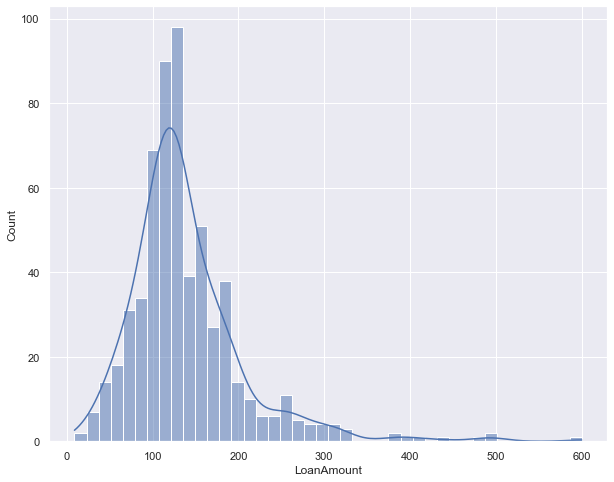

In [38]:
plt.figure(figsize=(10,8))
sns.histplot( dummies_data['LoanAmount'] , kde=True)

In [39]:
dummies_data = dummies_data[  dummies_data['LoanAmount'] < q ]
dummies_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,2166.0,128.0,360.0,1.0,1,0,1,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,0,1,0,0,0,0,0,0
2,3000,2166.0,66.0,360.0,1.0,1,1,1,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,0,0,1,1
4,6000,2166.0,141.0,360.0,1.0,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,2166.0,71.0,360.0,1.0,0,0,1,0,0,0,0,0,0,1
610,4106,2166.0,40.0,180.0,1.0,1,1,0,0,0,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,1,1,0,1,0,0,0,0,1,1
612,7583,2166.0,187.0,360.0,1.0,1,1,0,0,1,0,0,0,1,1


<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

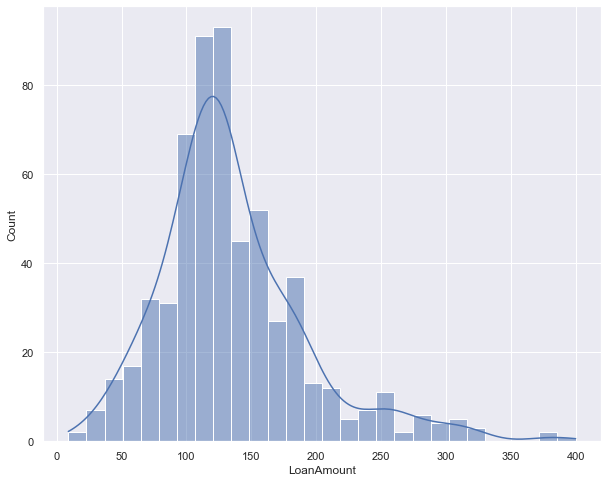

In [40]:
plt.figure(figsize=(10,8))
sns.histplot( dummies_data['LoanAmount'] , kde=True)

### EDA IS FINISHED

In [41]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [42]:
X = dummies_data.drop('Loan_Status_Y',axis=1)
y = dummies_data['Loan_Status_Y']
X_train , X_test, y_train, y_test = train_test_split(X,y,random_state=1)


# Model Training

In [43]:
# LOG ---> heatmaps 

# DT ----> Hyperpara, DT construct
# RF ----> GSCV
# ADA ---> Outliers
# KNN ----> 

from sklearn.linear_model import LogisticRegressionCV

log = LogisticRegressionCV(cv=10,penalty='l2')
log.fit(X_train,y_train)

C:\Users\patil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionCV(cv=10)

In [44]:
y_pred = log.predict(X_test)
y_pred_class1 = log.predict_proba(X_test)

In [45]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import sklearn.metrics as metrics

In [46]:
accuracy_score(y_test,y_pred)

0.8231292517006803

In [47]:
confusion_matrix(y_test,y_pred)

array([[22, 23],
       [ 3, 99]], dtype=int64)

In [48]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

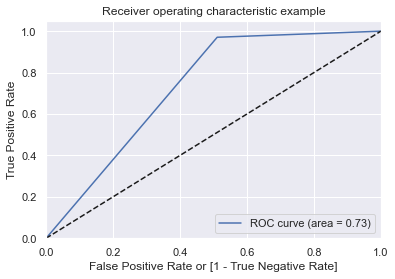

(array([0.        , 0.51111111, 1.        ]),
 array([0.        , 0.97058824, 1.        ]),
 array([2, 1, 0]))

In [49]:
draw_roc(y_test,y_pred)

## Finding Optimal Cutoff Point

In [50]:
# Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [51]:
perf_df = pd.DataFrame(y_test)

In [52]:
perf_df['Predicted'] = y_pred
perf_df['Proba'] = y_pred_class1[:,1]

In [53]:
perf_df = perf_df.rename( columns={'Loan_Status_Y': 'Actual'})

perf_df

,Actual,Predicted,Proba
529,1,1,0.696723
587,1,1,0.736105
24,0,1,0.854576
578,1,1,0.811836
91,1,1,0.901030
...,...,...,...
69,0,0,0.228910
474,1,1,0.715556
4,1,1,0.670750
536,1,1,0.561084


In [54]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    perf_df[i]= perf_df.Proba.map( lambda x: 1 if x > i else 0)
perf_df.head()

,Actual,Predicted,Proba,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
529,1,1,0.696723,1,1,1,1,1,1,1,0,0,0
587,1,1,0.736105,1,1,1,1,1,1,1,1,0,0
24,0,1,0.854576,1,1,1,1,1,1,1,1,1,0
578,1,1,0.811836,1,1,1,1,1,1,1,1,1,0
91,1,1,0.901030,1,1,1,1,1,1,1,1,1,1


In [55]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( perf_df.Actual, perf_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.693878,1.000000,0.000000
0.1,0.1,0.700680,1.000000,0.022222
0.2,0.2,0.755102,0.990196,0.222222
0.3,0.3,0.816327,0.980392,0.444444
0.4,0.4,0.809524,0.970588,0.444444
0.5,0.5,0.823129,0.970588,0.488889
0.6,0.6,0.795918,0.931373,0.488889
0.7,0.7,0.700680,0.754902,0.577778
0.8,0.8,0.530612,0.392157,0.844444
0.9,0.9,0.326531,0.029412,1.000000


<AxesSubplot:xlabel='prob'>

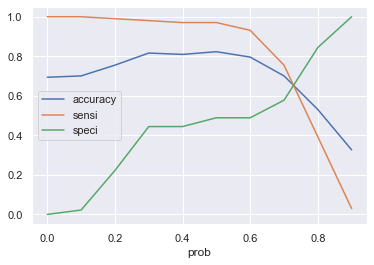

In [56]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [57]:
perf_df['final_predicted'] = perf_df.Proba.map( lambda x: 1 if x > 0.3 else 0)

In [58]:
perf_df['final_predicted']

529    1
587    1
24     1
578    1
91     1
      ..
69     0
474    1
4      1
536    1
548    0
Name: final_predicted, Length: 147, dtype: int64

In [59]:
metrics.accuracy_score( perf_df.Actual, perf_df.final_predicted)

0.8163265306122449